In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import os
from pathlib import Path
import glacierpoly as gpoly
import glob
import geopandas as gpd
from shapely.geometry import Polygon
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.io import imshow
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.measure import label, regionprops, regionprops_table
from rasterstats import zonal_stats
from rasterio.plot import show
from rasterio import mask
import subprocess

from IPython.display import Video

import glacierpoly as gpoly

import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

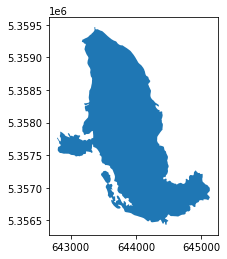

In [32]:
rgi = '/mnt/Backups/knuth/paper/south_cascade/final_products/scg_test_data/rgi_glacier_oultine.geojson'

gdf = gpd.read_file(rgi)
gdf.plot()

In [33]:
! ls outputs/*full*geojson

outputs/glacier_outline_full_1967-09-21.geojson
outputs/glacier_outline_full_1970-09-29.geojson
outputs/glacier_outline_full_1974-08-10.geojson
outputs/glacier_outline_full_1977-10-03.geojson
outputs/glacier_outline_full_1979-08-20.geojson
outputs/glacier_outline_full_1979-10-06.geojson
outputs/glacier_outline_full_1984-08-14.geojson
outputs/glacier_outline_full_1986-09-05.geojson
outputs/glacier_outline_full_1987-08-21.geojson
outputs/glacier_outline_full_1990-09-05.geojson
outputs/glacier_outline_full_1991-09-09.geojson
outputs/glacier_outline_full_1992-07-28.geojson
outputs/glacier_outline_full_1992-09-15.geojson
outputs/glacier_outline_full_1992-09-18.geojson
outputs/glacier_outline_full_1992-10-06.geojson
outputs/glacier_outline_full_1994-09-06.geojson
outputs/glacier_outline_full_1996-09-10.geojson
outputs/glacier_outline_full_1997-09-23.geojson


In [34]:
polygons = sorted(glob.glob('outputs/*full*geojson'))

In [35]:
glaciers = []
for p in polygons:
    tmp = gpd.read_file(p)
    glaciers.append(tmp)

In [36]:
xlim = ([gdf.total_bounds[0],  gdf.total_bounds[2]])
ylim = ([gdf.total_bounds[1],  gdf.total_bounds[3]])

In [37]:
# %%capture
for i,g in enumerate(glaciers):
    fig,ax = plt.subplots(figsize=(10,10))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.axis('off')
    ax.set_title(polygons[i].split("_")[-1].split(".")[0],fontsize=30)
    g.plot(ax=ax)
    fig.savefig('test_'+str(i).zfill(2)+'.png')
    plt.close()

In [38]:
! rm video_name.mp4

subprocess.call([
    'ffmpeg', '-framerate', '4', '-pattern_type', 'glob', '-i', 'test_*.png', '-r', '30', '-pix_fmt', 'yuv420p',
    'video_name.mp4'
])

0

In [39]:
Video("video_name.mp4")

In [ ]:
# ffmpeg -i video_name.mp4 -vf "fps=10,scale=320:-1:flags=lanczos,split[s0][s1];[s0]palettegen[p];[s1][p]paletteuse" -loop 0 output.gif


In [ ]:
# ffmpeg \
#   -i video_name.mp4 \
#   -i video_name.mp4 \
#   -filter_complex '[0:v]pad=iw*2:ih[int];[int][1:v]overlay=W/2:0[vid]' \
#   -map '[vid]' \
#   -c:v libx264 \
#   -crf 23 \
#   -preset veryfast \
#   output.mp4